This notebook will analyze

1. the number of responses recorded in the CSVs
2. the number of responses recorded in `info.png`.

In [1]:
import os
import caption_contest_data as ccd

In [2]:
contests = ccd.all_contests()
print(contests)

{'510_summary_LilUCB.csv', '519_summary_RoundRobin.csv', '511_summary_LilUCB.csv', 520, 521, 522, 523, 524, 526, 527, 528, '514_summary_RoundRobin.csv', 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 547, 548, 546, 550, 551, 552, 553, 549, 555, 556, 557, 558, 554, 561, 562, '519_summary_LilUCB.csv', 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, '517_summary_LilUCB.csv', 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, '508-round1_summary_RoundRobin.csv', '560_summary_KLUCB_funny.csv', 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, '517_summary_RoundRobin.csv', 629, 630, 631, 632, 633, 634, 635, 636, 637, '559_summary_KLUCB.csv', 638, 639, 640, 641, '508-round2_summary_RoundRobin.csv', 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 

In [3]:
len(contests)

192

In [4]:
summaries = [ccd.summary(c, get=False, path="../contests/summaries") for c in contests]

In [5]:
import pandas as pd
summary = pd.concat(summaries, sort=False)

In [6]:
summary.head()

,rank,funny,somewhat_funny,unfunny,count,score,precision,contest,caption,target_id,original,somewhat_original,unoriginal
0,1,18.0,27.0,24.0,69,1.913043,0.094022,510,I'm a congressman--obstruction is my job.,NaN,NaN,NaN,NaN
1,2,5.0,6.0,8.0,19,1.842105,0.191381,510,"I'm what they mean when they say, 'The middle ...",NaN,NaN,NaN,NaN
2,3,8.0,16.0,21.0,45,1.711111,0.112915,510,Does this suit make me look flat?,NaN,NaN,NaN,NaN
3,4,3.0,14.0,15.0,32,1.625000,0.116657,510,"When the right woman comes along, I'll know it.",NaN,NaN,NaN,NaN
4,5,6.0,9.0,19.0,34,1.617647,0.133610,510,"I used to lie in the gutter, but then I quit d...",NaN,NaN,NaN,NaN


In [7]:
import numpy as np
df = summary.pivot_table(index="contest", values="count", aggfunc=np.sum)
df.head()

,count
contest,
508,137868
509,98241
510,82627
511,56660
512,43120


In [8]:
if "count" in df.columns:
    df["responses"] = df["count"]
    del df["count"]
df = df.sort_values(by="contest")

In [9]:
show = df.iloc[-10:].copy()
show["responses"] /= 1e6

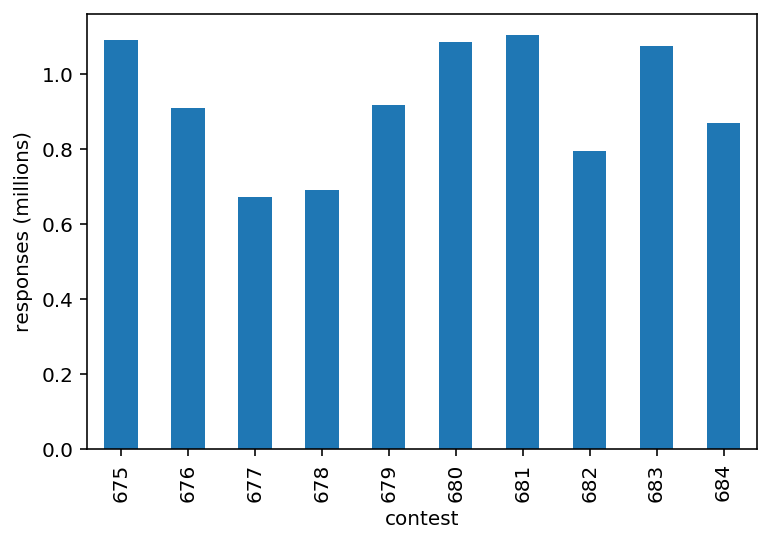

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
show.plot.bar(ax=ax)
ax.set_ylabel('responses (millions)')
ax.legend_.remove()

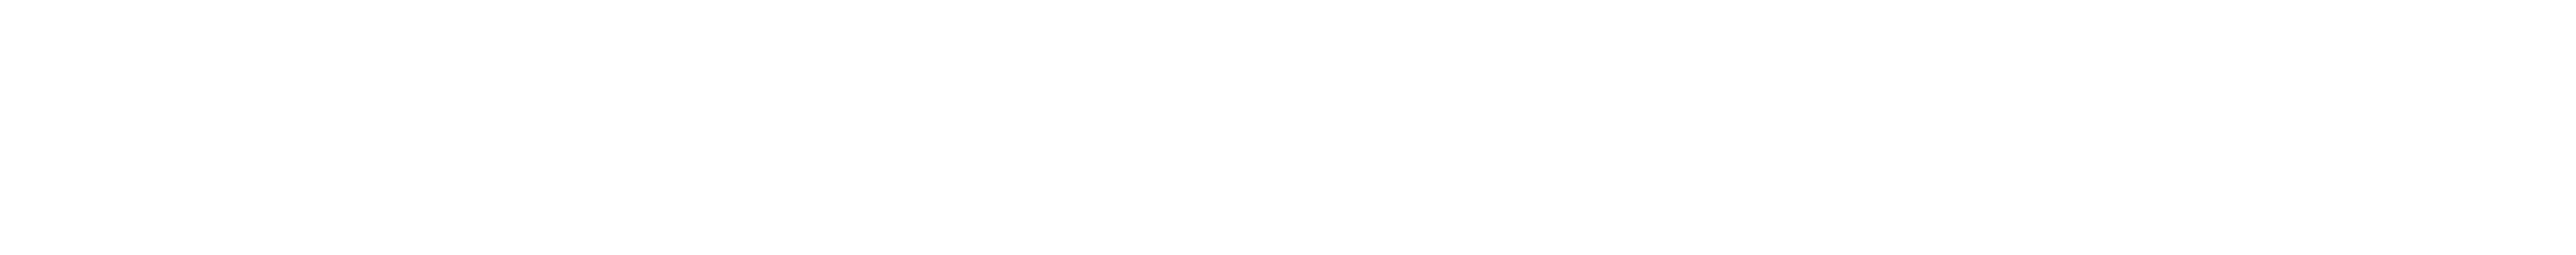

In [12]:
from altair import Chart, X, Y, Scale

show = df.copy()
show["contest"] = show.index
Chart(show).mark_bar().encode(
    x=X('contest:O', scale=Scale(zero=False)),
    y='responses')

In [13]:
sum(df["responses"]) / 1e6

118.107991